# **MNIST classification with keras model**

import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/Python/ICA/01_MNIST_keras_tf'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [3]:
import tensorflow as tf
import keras
from keras.datasets import mnist


# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax
import numpy as np
import time

# Import dependencies
import json
from keras.models import model_from_json, load_model

Using TensorFlow backend.


set the basic configurations, load the MNIST database and convert it to the necessary format

In [4]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [0]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('Keras_model_graph_optimized.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/dense_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/conv2d_1_input:0')

Average time for  4 [ms]:  2.2066783905029297
Average time for  8 [ms]:  1.7993640899658203
Average time for  16 [ms]:  2.1537375450134277
Average time for  32 [ms]:  2.6535916328430176
Average time for  64 [ms]:  3.6919569969177246
Average time for  128 [ms]:  4.896583557128906
Average time for  256 [ms]:  7.317144870758057


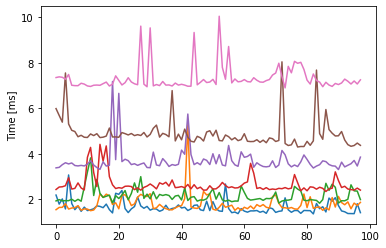

In [10]:
# We launch a Session
sess = tf.Session(graph=graph)

times=np.zeros((100,7))

for i in range(7):
  for x in range(100):
    start_time_one_batch=time.time()
    sess.run(output_node, feed_dict={input_node: x_test[0:2**(i+2)].reshape((2**(i+2),28,28,1))})
    end_time_one_batch=time.time()
    times[x,i]=((end_time_one_batch-start_time_one_batch)*1000)

plt.plot(times[2:,:])
plt.ylabel('Time [ms]')
for i in range(7):
    print('Average time for ',2**(i+2) ,'[ms]: ',sum(times[:,i])/len(times[:,i]))

In [11]:
for i in range(7):
    print(sum(times[:,i])/len(times[:,i]))

2.2066783905029297
1.7993640899658203
2.1537375450134277
2.6535916328430176
3.6919569969177246
4.896583557128906
7.317144870758057
